# Úkol č. 2 - předzpracování dat a binární klasifikace (do 2. listopadu 23:59)

  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * V Jupyter notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny vhodné k trénování modelu.
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor nahrajte do repozitáře.
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí křížové validace. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor s predikcemi pro vyhodnocovací data (`results.csv`).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni**

# -----------------------------------------------------------------------------------------------------------

## Imports

In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

* The first step is to load the dataset and get a look at what kind of data we're working with, so we can have a look at the first few rows
* A general summary of the data and seeing what kind of data types we are handling is also useful

In [2]:
data = pd.read_csv('data.csv')
display(data.head())
data.info()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
1,1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,NaN
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,NaN
3,3,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN
4,4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      226 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  554 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


* It's also helpful to have a look at the number of missing values in the columns to see how useful the columns may be

In [3]:
data.isna().sum()

ID             0
survived       0
pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       2
home.dest    446
dtype: int64

* The number of unique values in each column may also give us some insight into which variables could be useful, because when there is a lot of different values, we most likely will not find a reasonable way to utilize them in the model

In [4]:
data.nunique()

ID           1000
survived        2
pclass          3
name          999
sex             2
age            93
sibsp           7
parch           8
ticket        740
fare          248
cabin         156
embarked        3
home.dest     308
dtype: int64

* Based on my initial analysis of the data, I think we can safely drop a few columns
* The artificial **ID** is definitely not going to be useful, it just increases the dimensionality of the problem
* **Name** of the passengers will probably not give us much insight into their likelihood of survival and the same can be said for **ticket**, since both these columns have a large amount of unique values and also, they logically shouldn't have effect on the predicted variable
* My initial thought was that the variable **cabin** could be potentially useful (passengers in the cabins closer to the top of the boat could have a higher chance of survival since it took longer for the water to get there), however, we have a very large amount of missing values in this column, which leads me to believe it would be better to simplify the model and leave this variable out, it will likely not be useful
* The last variable I decided to drop was **home.dest**, because firstly there is a lot of missing values in the column (if we were to drop them, data would get reduced to about a half) and not really a great way to fill them in logically and secondly there is a lot of unique values, which once again leads to us having a fairly low chance of finding a relationship between this variable and the predicted variable

In [5]:
df = data.drop(['ID', 'name', 'ticket', 'cabin', 'home.dest'], axis=1)

* Since I am very confident, that **age** played a role in a passenger's chance at survival (I believe children would have had priority on the life boats), I have decided to deal with the fairly significant amount of missing values and use the Pandas linear interpolate function to fill these values in

In [6]:
df['age'] = df['age'].interpolate()

* Based on subject matter knowledge, I would expect the children and the elderly to have a higher chance of survival and since it may be more difficult for the model to distinguish which of the ages this may be if they are a continuous variable, I will split the **age** variable into 5 categories of **age_bracket** and hopefully simplify the problem

In [7]:
for index, row in df.iterrows():
    age = row['age']
    if age <= 15:
        df.loc[index, 'age_bracket'] = 0
    elif age <= 25:
        df.loc[index, 'age_bracket'] = 1
    elif age <= 45:
        df.loc[index, 'age_bracket'] = 2
    elif age <= 60:
        df.loc[index, 'age_bracket'] = 3
    else:
        df.loc[index, 'age_bracket'] = 4
df['age_bracket'] = df['age_bracket'].astype('int').astype('category')
df['age_bracket'].values

[1, 2, 1, 1, 2, ..., 1, 2, 2, 2, 2]
Length: 1000
Categories (5, int64): [0, 1, 2, 3, 4]

* Since we now have the information about passengers' age simpified as **age_bracket**, we can drop **age** so that we don't have high multicollinearity between the two variables

In [8]:
df = df.drop(['age'], axis=1)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,age_bracket
0,1,3,male,0,0,8.0500,S,1
1,1,2,female,0,0,13.0000,S,2
2,0,3,female,0,0,6.7500,Q,1
3,0,3,male,1,9,69.5500,S,1
4,0,3,female,0,0,8.6625,S,2


* This left us with only two rows containing a missing value in the **embarked** column, which I think is an acceptable number of rows to drop

In [9]:
df = df.dropna()
print(df.isna().sum())
df.info()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
age_bracket    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     998 non-null    int64   
 1   pclass       998 non-null    int64   
 2   sex          998 non-null    object  
 3   sibsp        998 non-null    int64   
 4   parch        998 non-null    int64   
 5   fare         998 non-null    float64 
 6   embarked     998 non-null    object  
 7   age_bracket  998 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 63.5+ KB


* The info about the dataset displayed above tells us that two of the remaining variables are of type object, in this case strings
* Since we know that both of these variables (**sex** and **embarked**) have a low number of unique values, we can use one-hot encoding to create dummy varibales to replace them 


In [10]:
for col in ['sex', 'embarked']:
    df = pd.concat([
        df.drop(columns=[col]), pd.get_dummies(df[col], prefix=('d_' + col))
    ], axis=1)

* It is also important to know, that **pclass** is technically an ordinal variable, but since the classes are already ordered from highest to lowest (1-3), we don't have to adjust this representation, we can just let the dataframe know that those are the only acceptable values by converting the *int64* type to *category*

In [11]:
df['pclass'] = df['pclass'].astype('category')
df['pclass'].values

[3, 2, 3, 3, 3, ..., 3, 3, 3, 3, 3]
Length: 998
Categories (3, int64): [1, 2, 3]

* Quick sanity check

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      998 non-null    int64   
 1   pclass        998 non-null    category
 2   sibsp         998 non-null    int64   
 3   parch         998 non-null    int64   
 4   fare          998 non-null    float64 
 5   age_bracket   998 non-null    category
 6   d_sex_female  998 non-null    uint8   
 7   d_sex_male    998 non-null    uint8   
 8   d_embarked_C  998 non-null    uint8   
 9   d_embarked_Q  998 non-null    uint8   
 10  d_embarked_S  998 non-null    uint8   
dtypes: category(2), float64(1), int64(3), uint8(5)
memory usage: 46.1 KB


# Decision Tree Classifier

## Building the model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

seed = 69

### Split data
* Our proper test set is the *evaluation.csv*, but since I do not have the labels for that dataset, I will create a train-validation-test split on *data.csv* in order to be able to test my model on previously completely unseen data
* I have decided to have about 60 % of my data left for training, 24 % validation and 16 % test

In [14]:
# train-test split
x_train, x_rest, y_train, y_rest = train_test_split(
    df.drop(columns=['survived']), df.survived, test_size=0.4, random_state=seed
)

# split to separate validation and actual test sets
x_val, x_test, y_val, y_test = train_test_split(
    x_rest, y_rest, test_size=0.4, random_state=seed
)

print(f'Training set ({x_train.shape[0]/len(df):.2%}): {x_train.shape}, {y_train.shape}')
print(f'Validation set ({x_val.shape[0]/len(df):.2%}): {x_val.shape}, {y_val.shape}')
print(f'Test set ({x_test.shape[0]/len(df):.2%}): {x_test.shape}, {y_test.shape}')

Training set (59.92%): (598, 10), (598,)
Validation set (24.05%): (240, 10), (240,)
Test set (16.03%): (160, 10), (160,)


### Train model
* We start by tuning the hyperparameters of *max_depth* and *split criterion* and saving the results, plotting them and finding the ones that give best results

In [15]:
# define hyperparameters for tuning
param_grid_dt = {
    'max_depth': range(1,30),
    'criterion': ['entropy', 'gini']
}

param_comb_dt = ParameterGrid(param_grid_dt)

train_acc_dt = []
val_acc_dt = []

# for each pair of parameters, train a decision tree and test its prediction accuracy on both train and validation set
for params in param_comb_dt:
    dt = DecisionTreeClassifier(**params, random_state=seed).fit(x_train, y_train)
    train_acc_dt.append(metrics.accuracy_score(y_train, dt.predict(x_train)))
    val_acc_dt.append(metrics.accuracy_score(y_val, dt.predict(x_val)))

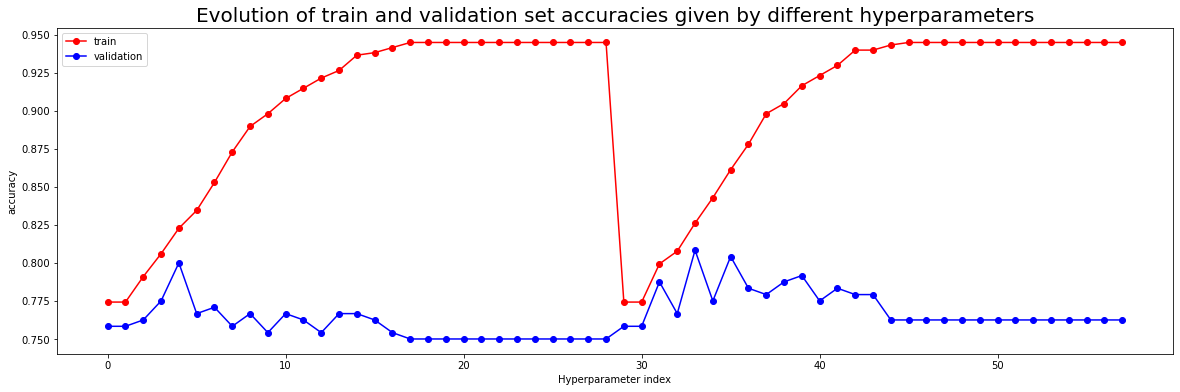

In [16]:
plt.figure(figsize=(20,6))
plt.plot(train_acc_dt,'or-')
plt.plot(val_acc_dt,'ob-')
plt.xlabel('Hyperparameter index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.title('Evolution of train and validation set accuracies given by different hyperparameters', fontsize=20)
plt.show()

In [17]:
best_params_dt = param_comb_dt[np.argmax(val_acc_dt)]
print(f'Best parameters: {best_params_dt}')
print(f'Accuracy achieved on training set: {train_acc_dt[np.argmax(val_acc_dt)]:.2%}')
print(f'Accuracy achieved on validation set: {val_acc_dt[np.argmax(val_acc_dt)]:.2%}')

Best parameters: {'max_depth': 5, 'criterion': 'gini'}
Accuracy achieved on training set: 82.61%
Accuracy achieved on validation set: 80.83%


### Test model

* Now that we have found the best parameters for our decision tree classifier, we take all our training data (train and validation set) and use all of it to train a classifier with the best found parameters
* We then test this classifier on the test data that has not impacted the model training process whatsoever to get an unbiased classification accuracy

In [18]:
x_train_all = pd.concat([x_train, x_val])
y_train_all = pd.concat([y_train, y_val])

dt = DecisionTreeClassifier(**best_params_dt, random_state=seed).fit(x_train_all, y_train_all)
dt_acc_train = metrics.accuracy_score(y_train_all, dt.predict(x_train_all))
dt_acc_test = metrics.accuracy_score(y_test, dt.predict(x_test))
print(f'Accuracy achieved on combined training set (train + validation): {dt_acc_train:.2%}')
print(f'Accuracy achieved on test set: {dt_acc_test:.2%}')

Accuracy achieved on combined training set (train + validation): 81.50%
Accuracy achieved on test set: 80.62%


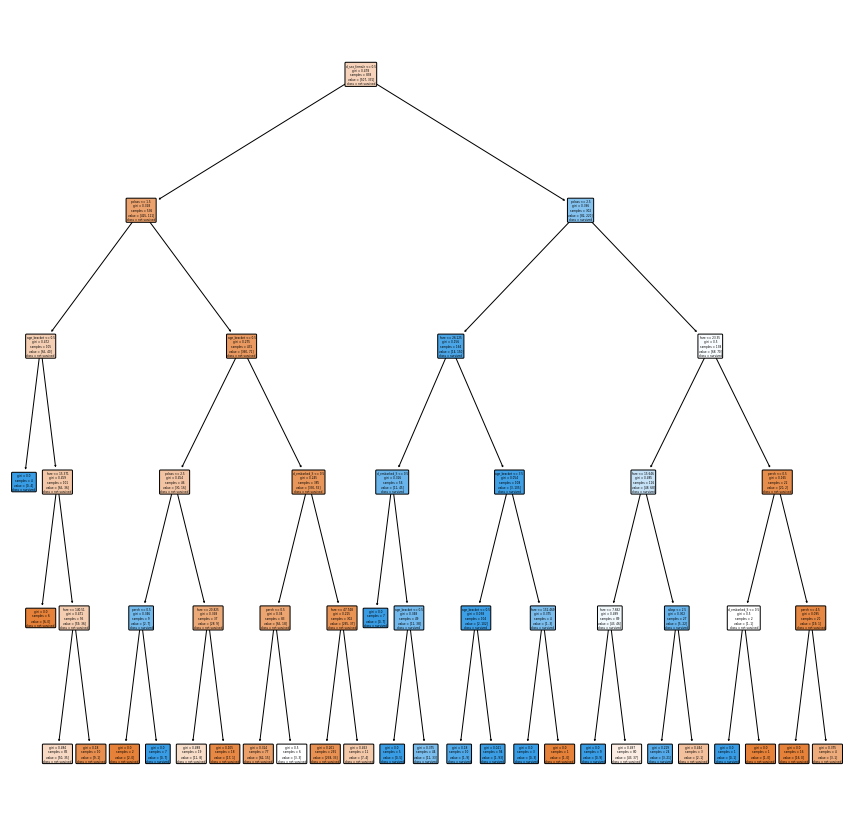

In [19]:
plt.figure(figsize=(15,15))
graph = plot_tree(dt, filled=True, feature_names=x_train_all.columns, class_names=['not survived', 'survived'], rounded=True)

#### *Note: I am not generating results for the evaluation.csv data yet, as I am planning on trying out more models and I want to use the best one to make the predictions*

# Random Forest
* In order to potentially achieve higher accuracies, we should try other models as well
* The first of these is the Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

* Aside from *max_depth*, we can also tune the hyperparameter *n_estimators* which tells the Random Forest how many sub-trees to generate and take into account when making a decision
* In order to make the results less dependant on the train-validation-test split, we should approach the data split with the cross-validation technique
* I have decided to use 10-fold cross-validation and take the mean of the results as the expected result for the given set of parameters

### Train model
* We start by tuning the hyperparameters of *max_depth* and *n_estimators* and saving the results, plotting them and finding the ones that give best results
* The tuning of hyperparameters is done on train a validation sets generated by the cross-validation method

In [21]:
# define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': range(1, 50, 2),
    'max_depth': range(1,20)
}

param_comb_rf = ParameterGrid(param_grid_rf)

train_acc_rf = []
val_acc_rf = []

# for each pair of parameters, train a random forest on 10 folds of cross-validation sets and save average
# train and validation set accuracy
for params in param_comb_rf:

    comb_train_acc = []
    comb_val_acc = []
    for train, val in KFold(n_splits=10, random_state=seed).split(x_train_all.index):

        x_train = x_train_all[x_train_all.index.isin(train)]
        y_train = y_train_all[y_train_all.index.isin(train)]
        x_val = x_train_all[x_train_all.index.isin(val)]
        y_val = y_train_all[y_train_all.index.isin(val)]
        
        rf = RandomForestClassifier(**params, random_state=seed).fit(x_train, y_train)
        comb_train_acc.append(metrics.accuracy_score(y_train, rf.predict(x_train)))
        comb_val_acc.append(metrics.accuracy_score(y_val, rf.predict(x_val)))
    
    train_acc_rf.append(np.mean(comb_train_acc))
    val_acc_rf.append(np.mean(comb_val_acc))

In [22]:
best_index_rf = np.argmax(val_acc_rf)
best_params_rf = param_comb_rf[best_index_rf]
print(f'Best params: {best_params_rf}')
print(f'Best training set accuracy: {train_acc_rf[best_index_rf]:.2%}')
print(f'Best validation set accuracy: {val_acc_rf[best_index_rf]:.2%}')

Best params: {'n_estimators': 11, 'max_depth': 9}
Best training set accuracy: 90.05%
Best validation set accuracy: 80.12%


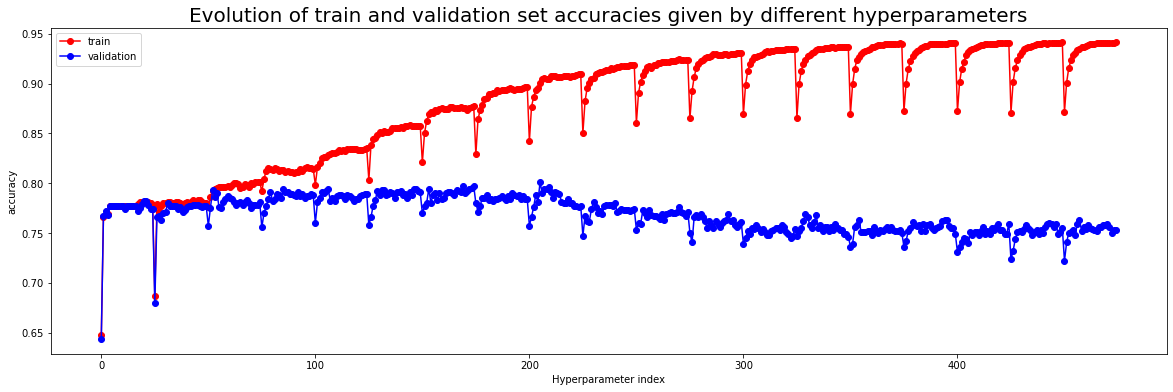

In [23]:
plt.figure(figsize=(20,6))
plt.plot(train_acc_rf,'or-')
plt.plot(val_acc_rf,'ob-')
plt.xlabel('Hyperparameter index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.title('Evolution of train and validation set accuracies given by different hyperparameters', fontsize=20)
plt.show()

### Test model

In [24]:
rf = RandomForestClassifier(**best_params_rf, random_state=seed).fit(x_train_all, y_train_all)
rf_acc_train = metrics.accuracy_score(y_train_all, rf.predict(x_train_all))
rf_acc_test = metrics.accuracy_score(y_test, rf.predict(x_test))
print(f'Accuracy achieved on combined training set (train + validation): {rf_acc_train:.2%}')
print(f'Accuracy achieved on test set: {rf_acc_test:.2%}')

Accuracy achieved on combined training set (train + validation): 89.02%
Accuracy achieved on test set: 81.88%


# AdaBoost
* The last classifier we should check out is the AdaBoost, because it gradually targets those rows, which are difficult to predict, so it may be an interesting approach to our problem at hand

In [25]:
from sklearn.ensemble import AdaBoostClassifier

### Train model
* We start by tuning the hyperparameters of *max_depth* and *n_estimators* and saving the results, plotting them and finding the ones that give best results
* The tuning of hyperparameters is done on train a validation sets generated by the cross-validation method

In [26]:
# define hyperparameters for tuning
param_grid_ab = {
    'n_estimators': range(1, 50, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}

param_comb_ab = ParameterGrid(param_grid_ab)

train_acc_ab = []
val_acc_ab = []

# for each pair of parameters, train adaboost on 10 folds of cross-validation sets and save average
# train and validation set accuracy
for params in param_comb_ab:
    
    comb_train_acc = []
    comb_val_acc = []
    for train, val in KFold(n_splits=10, random_state=seed).split(x_train_all.index):

        x_train = x_train_all[x_train_all.index.isin(train)]
        y_train = y_train_all[y_train_all.index.isin(train)]
        x_val = x_train_all[x_train_all.index.isin(val)]
        y_val = y_train_all[y_train_all.index.isin(val)]
        
        ab = AdaBoostClassifier(**params, random_state=seed).fit(x_train, y_train)
        comb_train_acc.append(metrics.accuracy_score(y_train, ab.predict(x_train)))
        comb_val_acc.append(metrics.accuracy_score(y_val, ab.predict(x_val)))
    
    train_acc_ab.append(np.mean(comb_train_acc))
    val_acc_ab.append(np.mean(comb_val_acc))

In [27]:
best_index_ab = np.argmax(val_acc_ab)
best_params_ab = param_comb_ab[best_index_ab]
print(f'Best params: {best_params_ab}')
print(f'Best training set accuracy: {train_acc_rf[best_index_ab]:.2%}')
print(f'Best validation set accuracy: {val_acc_rf[best_index_ab]:.2%}')

Best params: {'n_estimators': 37, 'learning_rate': 0.3}
Best training set accuracy: 81.46%
Best validation set accuracy: 78.69%


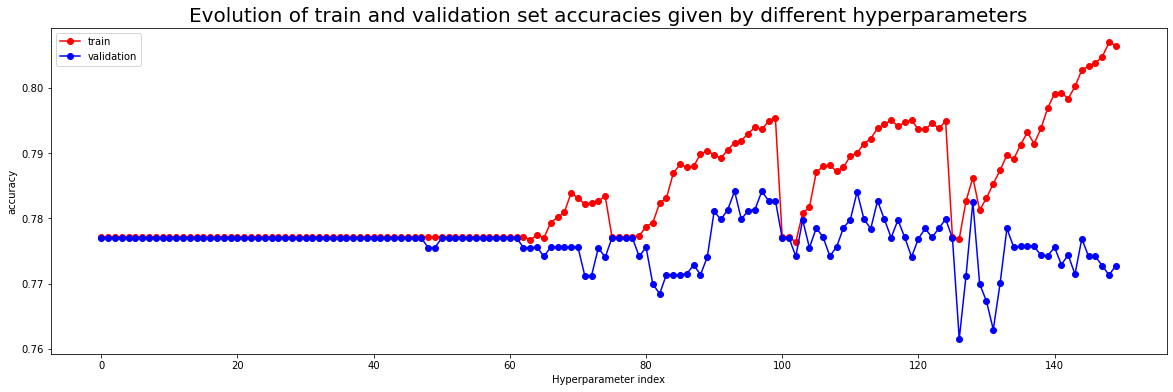

In [28]:
plt.figure(figsize=(20,6))
plt.plot(train_acc_ab,'or-')
plt.plot(val_acc_ab,'ob-')
plt.xlabel('Hyperparameter index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.title('Evolution of train and validation set accuracies given by different hyperparameters', fontsize=20)
plt.show()

### Test model

In [29]:
ab = AdaBoostClassifier(**best_params_ab, random_state=seed).fit(x_train_all, y_train_all)
ab_acc_train = metrics.accuracy_score(y_train_all, ab.predict(x_train_all))
ab_acc_test = metrics.accuracy_score(y_test, ab.predict(x_test))
print(f'Accuracy achieved on combined training set (train + validation): {ab_acc_train:.2%}')
print(f'Accuracy achieved on test set: {ab_acc_test:.2%}')

Accuracy achieved on combined training set (train + validation): 78.04%
Accuracy achieved on test set: 78.12%


## Compare results of trained models

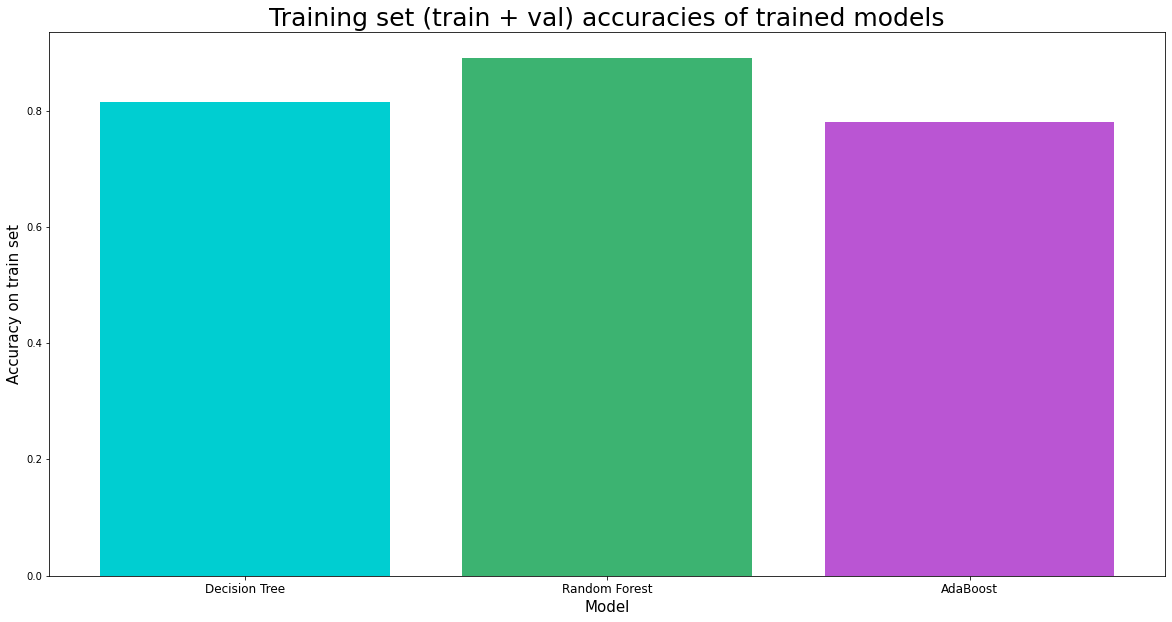

In [30]:
plt.figure(figsize=(20,10))
plt.bar(range(0,3), [dt_acc_train, rf_acc_train, ab_acc_train], color = [ 'darkturquoise' , 'mediumseagreen', 'mediumorchid'])
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy on train set', fontsize=15)
plt.xticks(range(0,3), ['Decision Tree', 'Random Forest', 'AdaBoost'], fontsize=12)
plt.title('Training set (train + val) accuracies of trained models', fontsize=25)
plt.show()

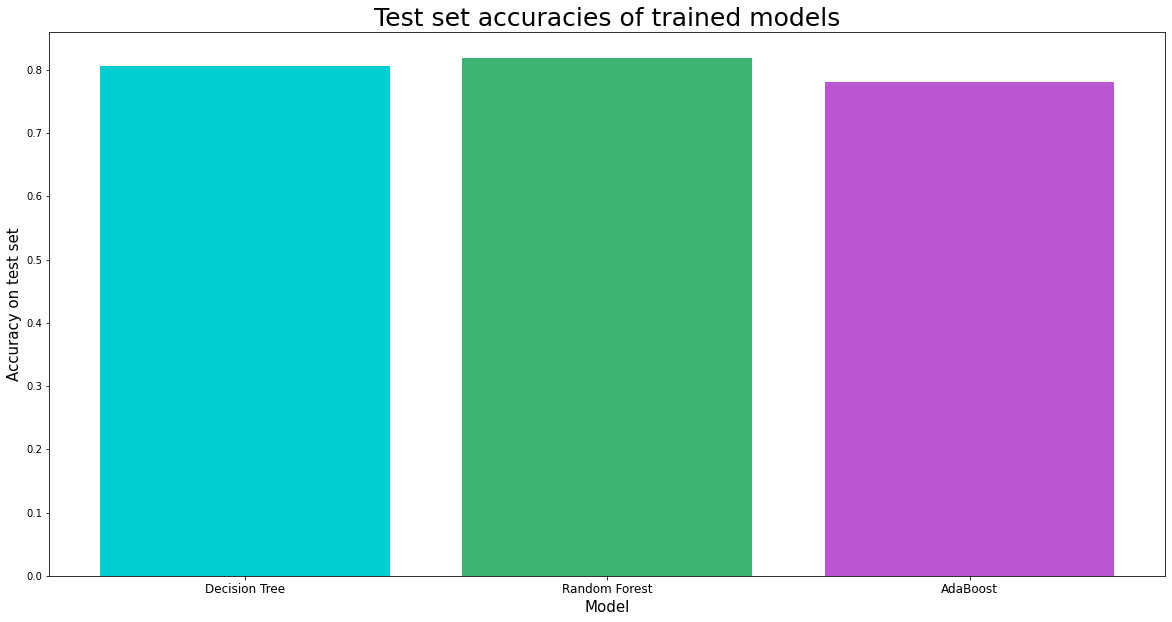

In [31]:
plt.figure(figsize=(20,10))
plt.bar(range(0,3), [dt_acc_test, rf_acc_test, ab_acc_test], color = [ 'darkturquoise' , 'mediumseagreen', 'mediumorchid'])
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy on test set', fontsize=15)
plt.xticks(range(0,3), ['Decision Tree', 'Random Forest', 'AdaBoost'], fontsize=12)
plt.title('Test set accuracies of trained models', fontsize=25)
plt.show()

# Results
* As we can see, the **Random Forest** model outperforms the other models
* Its training set accuracy is **89.02 %** and test set accuracy **81.88 %** which I think is quite decent
* There is only a slight difference between its results and results of the simple Decision Tree, but AdaBoost seems to be lagging behind a little
* We could perhaps argue that the Decision Tree is a more stable model, since the difference between the training and test set accuracis is very low, whereas the Random Forest may have perhaps overfitted some of the data
* Based on these observations, I will choose the classifier trained by the Random Forest model to predict values for the *evaluation.csv* dataset

# Filling-in missing values with KNNImputer

In [32]:
from sklearn.impute import KNNImputer

* Out of interest, I wanted to see if we could improve our classification accuracy by filling-in missing values using a more sophisticated technique than linear interpolation as previously
* I have therefore attempted to take advantage of sklearn's *KNNImputer*, which uses k-nearest neighbours of a data point to predict the value of the missing variable
* Previously I used linear interpolation for the **age** variable and I dropped **cabin** and two rows where **embarked** had missing values
* This time I will try to utilize all of these variables fully

In [33]:
df2 = data.drop(['ID', 'name', 'ticket', 'home.dest'], axis=1)

* In order for KNNImputer to work, we need to convert string variables into category codes

In [34]:
for col in ['sex', 'embarked', 'cabin']:
    df2[col] = df2[col].astype('category').cat.codes
    df2[col] = df2[col].replace(-1, np.nan)

* Next we re-split the data as previously (this time without dropping missing values)

In [35]:
# train-test split
x_train, x_rest, y_train, y_rest = train_test_split(
    df2.drop(columns=['survived']), df2.survived, test_size=0.4, random_state=seed
)

# split to separate validation and actual test sets
x_val, x_test, y_val, y_test = train_test_split(
    x_rest, y_rest, test_size=0.4, random_state=seed
)

print(f'Training set ({x_train.shape[0]/len(df2):.2%}): {x_train.shape}, {y_train.shape}')
print(f'Validation set ({x_val.shape[0]/len(df2):.2%}): {x_val.shape}, {y_val.shape}')
print(f'Test set ({x_test.shape[0]/len(df2):.2%}): {x_test.shape}, {y_test.shape}')

Training set (60.00%): (600, 8), (600,)
Validation set (24.00%): (240, 8), (240,)
Test set (16.00%): (160, 8), (160,)


* And now we can use KNNImputer to fill in the missing values in our splits

In [36]:
# KNNImputer nafitujeme na trénovacích datech a následně provedeme doplnění ve validačních datech
imputer = KNNImputer(n_neighbors=5, weights='distance')
x_train = pd.DataFrame(imputer.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_val = pd.DataFrame(imputer.transform(x_val), index=x_val.index, columns=x_val.columns)
x_test = pd.DataFrame(imputer.transform(x_test), index=x_test.index, columns=x_test.columns)

x_train_all2 = pd.concat([x_train, x_val])
y_train_all2 = pd.concat([y_train, y_val])

### Train Random Forest with filled-in missing values 

In [37]:
# define hyperparameters for tuning
param_grid_rf2 = {
    'n_estimators': range(1, 50, 2),
    'max_depth': range(1,20)
}

param_comb_rf2 = ParameterGrid(param_grid_rf2)

train_acc_rf2 = []
val_acc_rf2 = []

# for each pair of parameters, train a random forest on 10 folds of cross-validation sets and save average
# train and validation set accuracy
for params in param_comb_rf2:
    
    comb_train_acc = []
    comb_val_acc = []
    for train, val in KFold(n_splits=10, random_state=seed).split(x_train_all2.index):
        
        x_train = x_train_all2[x_train_all2.index.isin(train)]
        y_train = y_train_all2[y_train_all2.index.isin(train)]
        x_val = x_train_all2[x_train_all2.index.isin(val)]
        y_val = y_train_all2[y_train_all2.index.isin(val)]
        
        rf2 = RandomForestClassifier(**params, random_state=seed).fit(x_train, y_train)
        comb_train_acc.append(metrics.accuracy_score(y_train, rf2.predict(x_train)))
        comb_val_acc.append(metrics.accuracy_score(y_val, rf2.predict(x_val)))
    
    train_acc_rf2.append(np.mean(comb_train_acc))
    val_acc_rf2.append(np.mean(comb_val_acc))

In [38]:
best_index_rf2 = np.argmax(val_acc_rf2)
best_params_rf2 = param_comb_rf2[best_index_rf2]
print(f'Best params: {best_params_rf2}')
print(f'Best training set accuracy: {train_acc_rf2[best_index_rf2]:.2%}')
print(f'Best validation set accuracy: {val_acc_rf2[best_index_rf2]:.2%}')

Best params: {'n_estimators': 37, 'max_depth': 6}
Best training set accuracy: 87.46%
Best validation set accuracy: 80.58%


### Test model

In [39]:
rf2 = RandomForestClassifier(**best_params_rf2, random_state=seed).fit(x_train_all2, y_train_all2)
rf_acc_train2 = metrics.accuracy_score(y_train_all2, rf2.predict(x_train_all2))
rf_acc_test2 = metrics.accuracy_score(y_test, rf2.predict(x_test))
print(f'Accuracy achieved on combined training set (train + validation): {rf_acc_train2:.2%}')
print(f'Accuracy achieved on test set: {rf_acc_test2:.2%}')

Accuracy achieved on combined training set (train + validation): 85.24%
Accuracy achieved on test set: 80.00%


# Evaluation

* Unfortunately, the KNNImputer technique for filling-in missing values did not end up helping the accuracy at least on the currently used data split
* However, I am convinced that the method makes a lot of sense and will likely provide better results generally
* For this time though, I will stay with my first approach and use the Random Forest model I trained on the previous dataset to predict values for the *evaluation.csv* test file

* We start by preprocessing evaluation data so that it's in the expected form for the classifier

In [40]:
df_eval = pd.read_csv('evaluation.csv')

ids = df_eval['ID']
eval_test = df_eval.drop(['ID', 'name', 'ticket', 'cabin', 'home.dest'], axis=1)

eval_test['age'] = eval_test['age'].interpolate()
for index, row in eval_test.iterrows():
    age = row['age']
    if age <= 15:
        eval_test.loc[index, 'age_bracket'] = 0
    elif age <= 25:
        eval_test.loc[index, 'age_bracket'] = 1
    elif age <= 45:
        eval_test.loc[index, 'age_bracket'] = 2
    elif age <= 60:
        eval_test.loc[index, 'age_bracket'] = 3
    else:
        eval_test.loc[index, 'age_bracket'] = 4
eval_test['age_bracket'] = eval_test['age_bracket'].astype('int').astype('category')
eval_test = eval_test.drop(['age'], axis=1)

eval_test['fare'] = eval_test['fare'].interpolate()

for col in ['sex', 'embarked']:
    eval_test = pd.concat([
        eval_test.drop(columns=[col]), pd.get_dummies(eval_test[col], prefix=('d_' + col))
    ], axis=1)

eval_test['pclass'] = eval_test['pclass'].astype('category')

* Now we can classify the data, create a dataframe and save it into a file

In [41]:
res = pd.concat([ids, pd.Series(rf.predict(eval_test))], axis=1)
res.rename(columns={0: 'survived'}, inplace=True)
res

,ID,survived
0,1000,1
1,1001,1
2,1002,0
3,1003,1
4,1004,1
...,...,...
304,1304,0
305,1305,1
306,1306,0
307,1307,1


In [42]:
res.to_csv('results.csv', index=False)